In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('../data/loan_200k.csv' , low_memory=False)  
df = pd.read_csv('../data/loan.csv' , low_memory=False)  



In [3]:
leak_cols = [c for c in df.columns if "pymnt" in c or "recover" in c or "hardship" in c or "settlement" in c or 'total_rec' in c or 'out_prncp' in c  or 'last_pymnt' in c or 'next_pymnt' in c or 'last_credit_pull_d' in c]
leak_cols

['pymnt_plan',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [4]:
df.drop(columns=leak_cols, inplace=True)
df.drop(columns=['id', 'member_id', 'url', 'desc'], inplace=True)


In [5]:
target = df['loan_status'].copy()
df.drop(columns=['loan_status'], inplace=True)

In [6]:
df.isna().sum().to_dict()

{'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 166969,
 'emp_length': 146907,
 'home_ownership': 0,
 'annual_inc': 4,
 'verification_status': 0,
 'issue_d': 0,
 'purpose': 0,
 'title': 23326,
 'zip_code': 1,
 'addr_state': 0,
 'dti': 1711,
 'delinq_2yrs': 29,
 'earliest_cr_line': 29,
 'inq_last_6mths': 30,
 'mths_since_last_delinq': 1158502,
 'mths_since_last_record': 1901512,
 'open_acc': 29,
 'pub_rec': 29,
 'revol_bal': 0,
 'revol_util': 1802,
 'total_acc': 29,
 'initial_list_status': 0,
 'collections_12_mths_ex_med': 145,
 'mths_since_last_major_derog': 1679893,
 'policy_code': 0,
 'application_type': 0,
 'annual_inc_joint': 2139958,
 'dti_joint': 2139962,
 'verification_status_joint': 2144938,
 'acc_now_delinq': 29,
 'tot_coll_amt': 70276,
 'tot_cur_bal': 70276,
 'open_acc_6m': 866130,
 'open_act_il': 866129,
 'open_il_12m': 866129,
 'open_il_24m': 866129,
 'mths_since_rcnt_il': 

In [7]:
df['id'] = range(len(df))
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,payment_plan_start_date,orig_projected_additional_accrued_interest,disbursement_method,id
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,1
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,3
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,12000,12000.0,60 months,14.08,279.72,C,C3,house keeper,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260663
2260664,12000,12000,12000.0,60 months,25.82,358.01,E,E4,Skilled Labor,< 1 year,...,1.0,17.0,0.0,0.0,7.0,NaN,NaN,NaN,Cash,2260664
2260665,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Teacher,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260665
2260666,12000,12000,12000.0,60 months,21.45,327.69,D,D5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260666


In [8]:
# df = df[df['payment_plan_start_date'].notna()]
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,payment_plan_start_date,orig_projected_additional_accrued_interest,disbursement_method,id
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,1
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,3
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,12000,12000.0,60 months,14.08,279.72,C,C3,house keeper,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260663
2260664,12000,12000,12000.0,60 months,25.82,358.01,E,E4,Skilled Labor,< 1 year,...,1.0,17.0,0.0,0.0,7.0,NaN,NaN,NaN,Cash,2260664
2260665,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Teacher,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260665
2260666,12000,12000,12000.0,60 months,21.45,327.69,D,D5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260666


In [9]:
df.dtypes.to_dict()

{'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('float64'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('float64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('float64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('float64'),
 'pub_rec': dtype('float64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('float64'),
 'total_acc': dtype('float64'),
 'initial_list_status': dtype('O'),
 'collections_12_mths_ex_med': dtype('float64'),
 'mths_since_last_major_derog'

### class distribution of loan status

In [11]:
target.value_counts()

loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

In [13]:
loan_status_class = target.value_counts(normalize=True)

loan_status
Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: proportion, dtype: float64

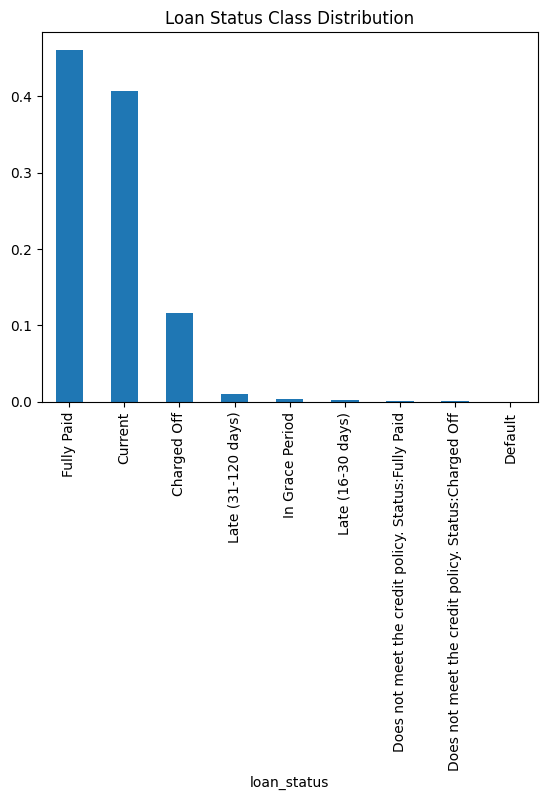

In [14]:
loan_status_class.plot(kind='bar', title='Loan Status Class Distribution')
loan_status_class

In [15]:
df['target_default'] = target.apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'] else 0)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,payment_plan_start_date,orig_projected_additional_accrued_interest,disbursement_method,id,target_default
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0,0
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,1,0
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2,0
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,3,0
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,12000,12000.0,60 months,14.08,279.72,C,C3,house keeper,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260663,0
2260664,12000,12000,12000.0,60 months,25.82,358.01,E,E4,Skilled Labor,< 1 year,...,17.0,0.0,0.0,7.0,NaN,NaN,NaN,Cash,2260664,0
2260665,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Teacher,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260665,0
2260666,12000,12000,12000.0,60 months,21.45,327.69,D,D5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2260666,0


In [16]:
target

0             Current
1             Current
2             Current
3             Current
4             Current
              ...    
2260663       Current
2260664    Fully Paid
2260665       Current
2260666       Current
2260667       Current
Name: loan_status, Length: 2260668, dtype: object